# Exploring and Analyzing Text Data Assignment 

In [1]:
!pip install textacy --quiet

     |████████████████████████████████| 204kB 2.8MB/s 
     |████████████████████████████████| 143kB 10.0MB/s 
     |████████████████████████████████| 3.0MB 8.8MB/s 
     |████████████████████████████████| 481kB 34.8MB/s 


In [0]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

nlp = spacy.load("en_core_web_sm")

In [3]:
!pip install rake_nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7821 sha256=bf960d6180d5131d82dc0309573e616dbf4471cc9010adb4f63e2b9c1b82fcb4
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [0]:
import requests
from bs4 import BeautifulSoup
import textacy
import itertools
from rake_nltk import Rake
from nltk import tree2conlltags
from gensim.summarization import keywords
from nltk.chunk.regexp import RegexpParser


### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [0]:
articles = ['http://lite.cnn.io/en/article/h_eac18760a7a7f9a1bf33616f1c4a336d',
            'http://lite.cnn.io/en/article/h_de3f82f17d289680dd2b47c6413ebe7c',
            'http://lite.cnn.io/en/article/h_72f4dc9d6f35458a89af014b62e625ad',
            'http://lite.cnn.io/en/article/h_aa21fe6bf176071cb49e09d422c3adf0',
            'http://lite.cnn.io/en/article/h_8ad34a532921c9076cdc9d7390d2f1bc',
            'http://lite.cnn.io/en/article/h_84422c79110d9989177cfaf1c5f45fe7',
            'http://lite.cnn.io/en/article/h_d010d9580abac3a44c6181ec6fb63d58',
            'http://lite.cnn.io/en/article/h_fb11f4e9d7c5323e75b337d9e9e5e368',
            'http://lite.cnn.io/en/article/h_7b27f0b131067f8ece6238ac559670ab',
            'http://lite.cnn.io/en/article/h_8cae7f735fa9573d470f802063ceffe2',
            'http://lite.cnn.io/en/article/h_72c3668280e82576fcc2602b0fa70c14',
            'http://lite.cnn.io/en/article/h_d20658fb0e20212051cda0e0a7248c8a',
            'http://lite.cnn.io/en/article/h_56611c43d7928120d2ae21666ccc7417',
            'http://lite.cnn.io/en/article/h_bda0394e3c5ee7054ee65c022bca7695']

In [0]:
TAGS = ['p']
data = []

for article in articles:
    response = requests.get(article)
    content = response.text
    soup = BeautifulSoup(content)
    text_list = [tag.get_text() for tag in soup.find_all(TAGS)]
    text = ' '.join(text_list)
    data.append(text)

In [0]:
!mkdir news_articles

In [0]:
for i, d in enumerate(data):
    file = open(f'./news_articles/article_{i}.txt', 'w')
    file.write(data[i])
    file.close()

In [9]:
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader
import nltk
nltk.download('punkt')
DOC_PATTERN = r'.*\.txt'
CAT_PATTERN = r'([\w_\s]+/.*)'

corpus = PlaintextCorpusReader('news_articles', DOC_PATTERN)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [0]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

In [11]:
docs

['(CNN) - Pink has been working pretty hard and it sounds like she will be taking a step back in 2020. Speaking with "Entertainment Tonight" on the Country Music Association Awards red carpet, the singer was joined by her husband, Carey Hart, and their kids Willow, 8, and Jameson, 2. Pink was there to perform her song "Love Me Anyway" with country star Chris Stapleton, and she  talked about how hectic things have been.  "We did two and a half years of [music] and Willow\'s back in school now, Jameson\'s going to start pre-school soon," Pink said. "It\'s kind of the year of the family." The star also praised her husband, with whom she will celebrate 14 years of marriage in January. "Carey has a lot going on as well," she said of Hart, who went from being a professional motocross competitor to racing off-road trucks. "He\'s super supportive, he follows me around the world and now it\'s his turn." According to Billboard, Pink\'s Beautiful Trauma Tour ranks as the 10th highest-grossing tou

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [0]:
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [
        token.lower()
        for token in tokens
        if not token.lower() in stopwords.words("english")
        if not token in string.punctuation
    ]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])

    spacy_doc = nlp(doc)
    remove = ["DATE", "TIME", "PERCENT", "MONEY", "QUANTITY", "ORDINAL", "CARDINAL"]
    entities = [entity.text for entity in spacy_doc.ents if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words

    stats = {
        "Number of Sentences": num_sents,
        "Number of Tokens": num_tokens,
        "Number of Words": num_words,
        "Vocabulary Size": vocab,
        "Number of Entities": num_entities,
        "Words per Sentence": words_sent,
        "Average Characters per Word": char_word,
        "Lexicon Diversity": lex_div,
    }

    return stats

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [0]:
doc_list = []

for doc in docs:
    stats = text_stats(doc)
    doc_list.append(stats)

In [0]:
doc_frame = pd.DataFrame(doc_list)

### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [15]:
doc_frame.describe()

,Number of Sentences,Number of Tokens,Number of Words,Vocabulary Size,Number of Entities,Words per Sentence,Average Characters per Word,Lexicon Diversity
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,42.142857,970.928571,522.928571,320.500000,36.142857,12.346972,5.884740,0.649435
std,25.267362,567.794175,311.580947,164.225338,22.473428,1.592346,0.480137,0.075649
min,12.000000,256.000000,138.000000,105.000000,12.000000,10.533333,5.193333,0.497154
25%,23.500000,577.250000,298.000000,192.750000,17.750000,11.008621,5.503671,0.620259
50%,42.000000,954.000000,508.500000,318.000000,31.000000,11.778367,5.799930,0.638078
75%,55.750000,1282.500000,679.250000,430.500000,40.500000,13.372428,6.214028,0.693307
max,92.000000,2057.000000,1073.000000,594.000000,81.000000,15.466667,6.815440,0.760870


### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

Text(0.5, 1.0, 'Term Frequency Distribution \n')

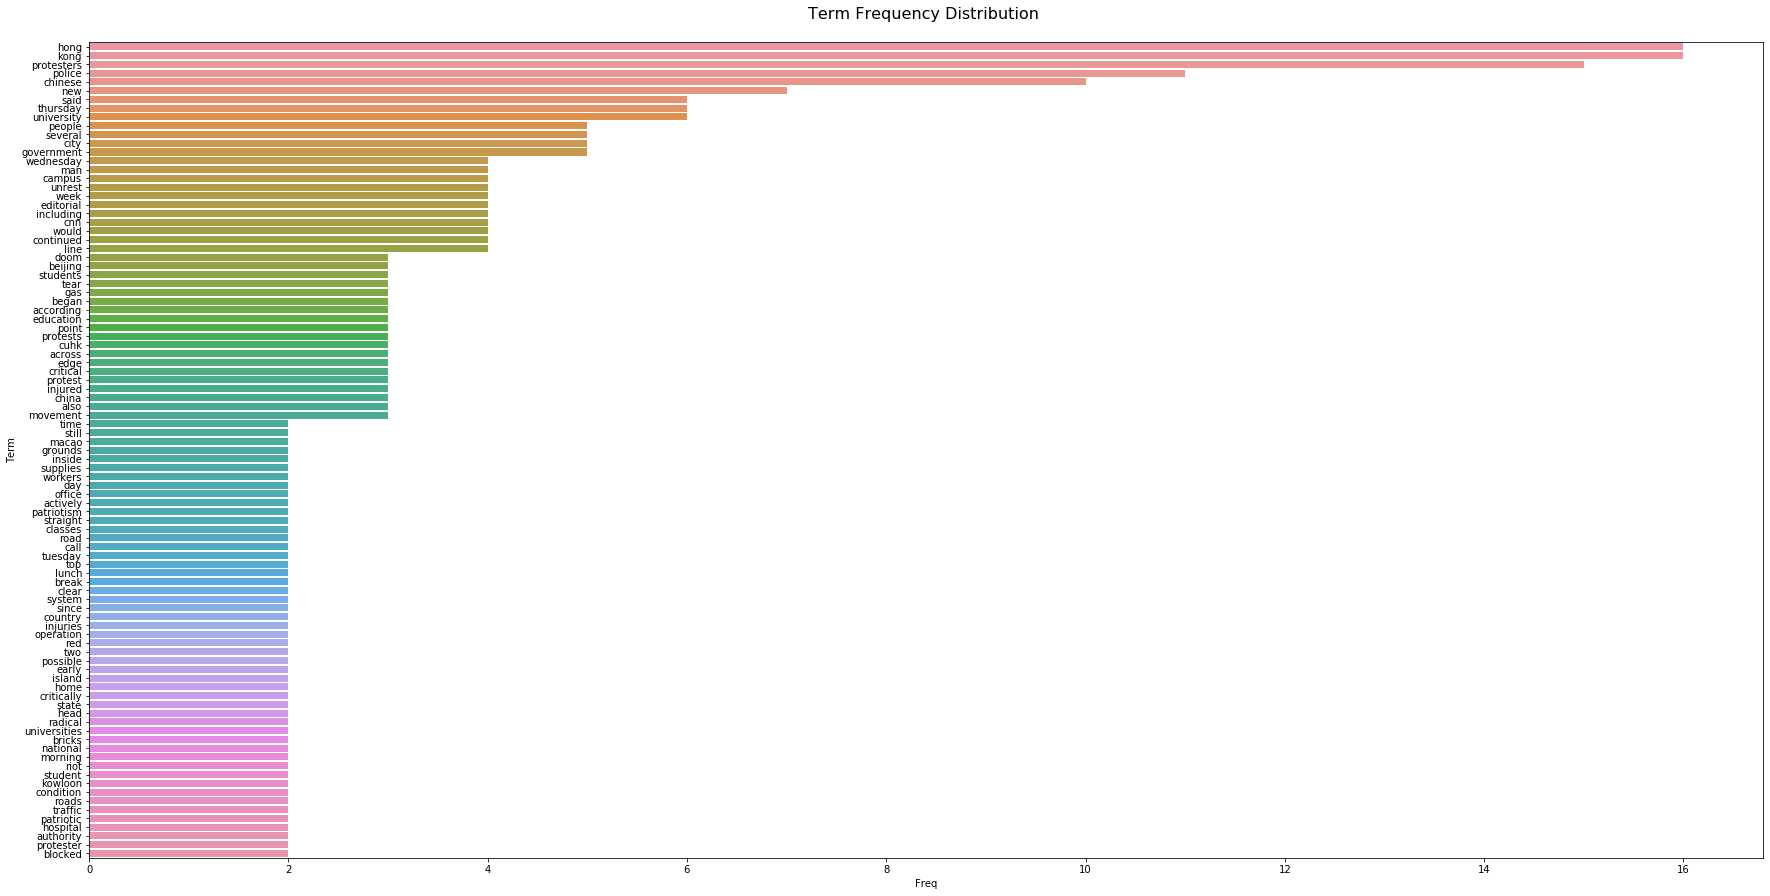

In [16]:
cleaned = [token.lower() for token in word_tokenize(doc)
            if token.lower() not in stopwords.words('english')
            if token.isalpha()==True]

fdist = FreqDist(cleaned)
fdist_df = pd.DataFrame.from_dict(fdist,orient='index').reset_index()
fdist_df.columns = ['Term','Freq']
ordered = fdist_df.sort_values('Freq', ascending=False)
filtered = ordered[ordered['Freq']>1]

plt.figure(figsize=(30,15 ))
sns.barplot(data=filtered, x='Freq',y='Term')
plt.title('Term Frequency Distribution \n', fontsize=16)

In [0]:
for i in cleaned:
    text_blk = ' '.join(i)


### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [18]:
doc

'Hong Kong  (CNN) - The threat of violence hung over Hong Kong Thursday evening as thousands of student protesters prepared to face off with riot police, amid a continued occupation of several of the city\'s most prestigious universities.  The level of unrest and destruction in the almost six-month-long protest movement has reached new and unnerving heights in recent days, with several people critically injured and Chinese state media warning radical protesters, "You are on the edge of doom." Sporadic clashes broke out Thursday morning, as police fired tear gas at protesters near the Hong Kong Polytechnic University in Kowloon. While on Hong Kong Island, roads surrounding the University of Hong Kong were blocked by protesters, resulting in traffic delays.  Universities have emerged as a new focal point of the protest movement, with numerous campuses across the city becoming home to heavily fortified temporary protest camps.  At the Chinese University of Hong Kong (CUHK) in the New Terr

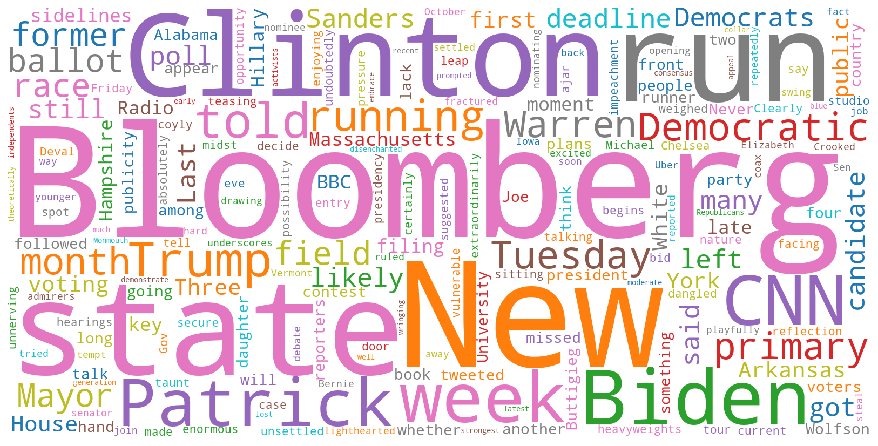

In [19]:
from wordcloud import WordCloud, STOPWORDS


# def word_cloud(cleaned, colormap='tab10', background_color='white'):
cloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS,
                      colormap= 'tab10', background_color='white').generate(docs[3])

plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

In [20]:
remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 'ORDINAL', 'CARDINAL']

nlp = spacy.load("en_core_web_sm")

for index, doc in enumerate(docs):
    spacy_doc = nlp(doc)
    entities = [[entity.text, entity.label_] for entity in spacy_doc.ents 
                if not entity.label_ in remove]
    
    entities.sort()
    entities = list(entity for entity,_ in itertools.groupby(entities))
    
    print('Article', index, 'Named Entities:')
    
    for entity in entities:
        print(entity)
        
    print('-----------')

Article 0 Named Entities:
['Billboard', 'NORP']
['CNN', 'ORG']
['Cable News Network', 'ORG']
['Carey', 'PERSON']
['Carey Hart', 'PERSON']
['Chris Stapleton', 'PERSON']
['Entertainment Tonight', 'WORK_OF_ART']
['Hart', 'ORG']
['Jameson', 'PERSON']
['Love Me Anyway', 'WORK_OF_ART']
['Turner Broadcasting System,', 'ORG']
['Willow', 'PERSON']
['the Country Music Association Awards', 'ORG']
-----------
Article 1 Named Entities:
['African American', 'NORP']
['Alabama', 'GPE']
['Arkansas', 'GPE']
['Bain Capital', 'ORG']
["Barack Obama's", 'PERSON']
['Boston', 'GPE']
['CBS This Morning', 'WORK_OF_ART']
['CNN', 'ORG']
['Cable News Network', 'ORG']
['Concord', 'GPE']
['Democratic', 'NORP']
['Democrats', 'NORP']
['Deval Patrick', 'PERSON']
['Diane', 'PERSON']
['Massachusetts', 'GPE']
['Michael Bloomberg', 'PERSON']
['Mitt Romney', 'PERSON']
['New Hampshire', 'GPE']
['New Jersey', 'GPE']
['New York City', 'GPE']
['Patrick', 'ORG']
['Patrick', 'PERSON']
['Republican', 'NORP']
['Romney', 'ORG']
['So

In [0]:
figures = ['Beijing','CCTV', 'Central district','China', 'Chinese', 'Chinese Communist Party', 'Global Times', 'Hong Kong', 'Hong Kong Island']

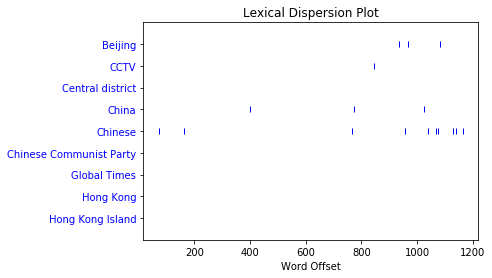

In [22]:
from nltk.text import Text

tokenized = word_tokenize(doc)
Text(tokenized).dispersion_plot(figures)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [23]:
from yellowbrick.text.postag import PosTagVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [25]:
tokens = word_tokenize(doc)
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(" ".join((visualizer.colorize(token,color)
                for color, token in visualizer.tagged)))

print('\n')

Hong Kong ( CNN ) - The threat of violence hung over Hong Kong Thursday evening as thousands of student protesters prepared to face off with riot police , amid a continued occupation of several of the city 's most prestigious universities . The level of unrest and destruction in the almost six-month-long protest movement has reached new and unnerving heights in recent days , with several people critically injured and Chinese state media warning radical protesters , `` You are on the edge of doom . '' Sporadic clashes broke out Thursday morning , as police fired tear gas at protesters near the Hong Kong Polytechnic University in Kowloon . While on Hong Kong Island , roads surrounding the University of Hong Kong were blocked by protesters , resulting in traffic delays . Universities have emerged as a new focal point of the protest movement , with numerous campuses across the city becoming home to heavily fortified temporary protest camps . At the Chinese University of Hong Kong ( CUHK ) 